# Introduction to Data Science

## A very short tour through Python

Roland Kwitt, WS 2020/2021

## Names/Objects/Variables

Python is completely **object oriented**, and **not** statically typed (but strongly typed). You do not need to declare variables (think of names assigned to an objects) before using them, or declare their type. Every variable in Python is an object with an ID and a state. Below are some examples. The `#` symbol marks a comment.

In [35]:
a = 1      # Integer
b = 2.1    # Floating point number
c = 'foo'  # String

# Print IDs
print(id(a), id(b), id(c))

# Print State
print(a,b,c)

print(a + b)
print(c + 'bar')

4348238176 140629925198256 140629852865456
1 2.1 foo
3.1
foobar


Types are checked when the code is executed!

In [70]:
if False:
    var = 1 + "foo" # Never checked
else:
    var = 1 + 3

## Data Structures

We cover three basic data structures: 

- **tuples**, 
- **lists** and 
- **dictionaries**. 

Accessing elements of tuples and lists starts at the integer **0**. Note that in the example below, the dictionary has no immediate order, i.e., we access its elements by *keys* to get the *values*.

In [69]:
a = (10,2,3)           # Tuple
b = [10,2,3]           # List
c = {'x': 1, 'y': 2}   # Dictionary

print(a[0],b[2],c['x'])

10 3 1
[4, 2, 3]


Note that **tuples** are immutable, i.e., you cannot change values once declared. E.g., `a[0]=3` does not work, however, this works for the list `b`. This is also the reason why tuples can be used as *keys* in dictionaries, e.g.:

In [38]:
try:
    c[a] = 10 # try to use tuple as key
except TypeError:
    print('An error occurred while using a tuple as key')

try:
    c[b] = 10 # try to use list as key (DOES NOT WORK)
except TypeError:
    print('An error occurred while using a list as key')

An error occurred while using a list as key


## Functions

In [74]:
# Function with two arguments returning the sum of those arguments
def fun1(a, b):
    c = a + b
    return c

print(fun1(1,2))

# Function with two arguments, the second one is a named argument with a default value
def fun2(a,b=2):
    return a+b

print(fun2(3))

# Function with variable number of arguments
def fun3(*args):
    return args[0]+args[1]

print(fun3(1,2,3,4,5,6,7,8,9))

3
5
9
None


Note here that the `*` operator unpacks the sequence/collection into positional arguments, i.e., `args[0], ...`

In [40]:
def fun4(**kwargs):
    print(kwargs)
    
fun4(a=10,b=20,c=30)

{'a': 10, 'b': 20, 'c': 30}


The double star `**` does the same, only using a dictionary and thus named arguments.

## Iterating over data structures

In [79]:
b = [10,11,12]

# Iterate over elements in list
for e in b:
    print(e)

# Iterate over elements in list via enumerating them
for i,element in enumerate(b):
    print(i, element)
    
c = {'x': 1, 'y': 2} # Dictionary

# Iterate over all (key,value) pairs in dictionary
for key,value in c.items():
    print(key,value)

10
11
12
0 10
1 11
2 12
10
11
12
x 1
y 2


## Boolean variables + Control structures

In [42]:
a = True

# If a is True print 1
if a == True:
    print(1)

# Equivalent to previous statement
if a: print(1)
    
# with an else clause
if a:
    print(1)
else:
    print(2)

1
1
1


## Classes

In [80]:
class Animal:
    def __init__(self, age=None, gender=None):
    
        self.age = age
        self.gender = gender
    
    def get_age(self):
        return self.age
    
    def get_gender(self):
        return self.gender
    
o1 = Animal(23, "F")
print(o1.get_gender())
o2 = Animal()
print(o2.get_gender())

F
None


For classes that implement the `__call__` method, its instances can be used like functions.

In [43]:
import numpy as np

class SquareMe:
    def __init__(self, ):
        pass
        
    def __call__(self, x):
        return np.power(x,2.0)

square_fn = SquareMe()
print(square_fn(3.0))

# check if callable
print(hasattr(zip, '__call__'))

9.0
True


## Some important modules

In [91]:
import numpy as np  # numpy for numerical computations
import sklearn      # sklearn for access to many machine learning methods

In [90]:
print(np.sin(np.pi)) # Example

1.2246467991473532e-16


## File I/O

In [92]:
# Write two integers on two separate lines into file '/tmp/x.txt'
with open('/tmp/x.txt', 'w') as fid:
    fid.write('%d\n' % 10)
    fid.write('%d\n' % 20)

In [93]:
# Read each line from that file into content (list)
with open('/tmp/x.txt', 'r') as fid:
    content = fid.readlines()

# convert each element in the list from above into an integer and store in content again
content = [int(x) for x in content]    
print(content)

[10, 20]


## Plotting

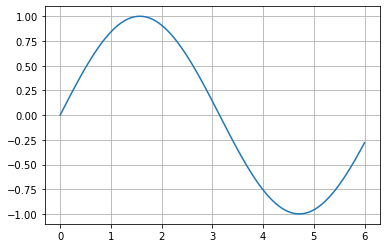

In [48]:
# for Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt

x = np.linspace(0,6,100)
y = np.sin(x)
plt.plot(x,y)
plt.grid()

## Pandas

In [48]:
import pandas as pd

In [49]:
# e.g., reading CSV files
df = pd.read_csv('biostats.csv')
df.head(10)

,Name,Sex,Age,Weight,Height
0,Alex,"""M""",41,74,170
1,Bert,"""M""",42,68,166
2,Carl,"""M""",32,70,155
3,Dave,"""M""",39,72,167
4,Elly,"""F""",30,66,124
5,Fran,"""F""",33,66,115
6,Gwen,"""F""",26,64,121
7,Hank,"""M""",30,71,158
8,Ivan,"""M""",53,72,175
9,Jake,"""M""",32,69,143


In [50]:
# Average age, weight, height per sex (M/F)
df.groupby(['Sex']).mean()

,Age,Weight,Height
Sex,,,
"""F""",31.142857,65.571429,123.285714
"""M""",36.909091,71.272727,161.636364
